**Machine Learning - Black and Indigenous Program!**

**Capstone Project with Auto Insurance Dataset: Valentine Udeh and Jean Paul Ngezigihe**


The goal is to predict **Total claim amount** with **DECISION TREE MODEL** using **customer information** 

### **Loading Packages**

In [ ]:
# Import relevant Python packages
import matplotlib.pyplot as plt        # visualization
import numpy as np                     # matrices and high-level math functions
import pandas as pd                    # data manipulation
import seaborn as sns                  # visualization (based on matplotlib)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from scipy import stats                # scientific computing
# sklearn is a popular machine learning library
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## **Part 1. Data Import**

In [ ]:
# Load the dataset into a pandas dataframe
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/drive/MyDrive/ML/AutoInsurance.csv' , index_col='Customer')
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## **Part 2. Data Exploration and Preprocessing**

In [ ]:
#Print out the number of rows and columns in the dataset
print('Data shape:', df.shape)

Data shape: (9134, 23)


In [ ]:
#Print out summary statistics for each variable in the dataset
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.State.value_counts()


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [ ]:
df.Response.value_counts()


No     7826
Yes    1308
Name: Response, dtype: int64

In [ ]:
df.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [ ]:
# Print out the data type of each feature in the dataset
print("Data type of each feature:")
df.dtypes

Data type of each feature:


State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
# Determine if there are any missing datapoints or duplicate rows in the dataset
print("\nAre there any missing datapoints in the dataset?", df.isnull().values.any())
print("Number of duplicated rows:", df.duplicated().sum())


Are there any missing datapoints in the dataset? False
Number of duplicated rows: 163


In [ ]:
# Remove the duplicate row from the dataset
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Confirm the final number of rows and columns in the dataset after data cleaning
print("df.shape =", df.shape)
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

df.shape = (8971, 23)
Number of rows = 8971
Number of columns = 23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8971 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          8971 non-null   object 
 1   Customer Lifetime Value        8971 non-null   float64
 2   Response                       8971 non-null   object 
 3   Coverage                       8971 non-null   object 
 4   Education                      8971 non-null   object 
 5   Effective To Date              8971 non-null   object 
 6   EmploymentStatus               8971 non-null   object 
 7   Gender                         8971 non-null   object 
 8   Income                         8971 non-null   int64  
 9   Location Code                  8971 non-null   object 
 10  Marital Status                 8971 non-null   object 
 11  Monthly Premium Auto           8971 non-null   int64  
 12  Months Since Last Claim        8971 non-null

In [ ]:
#check missing values
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

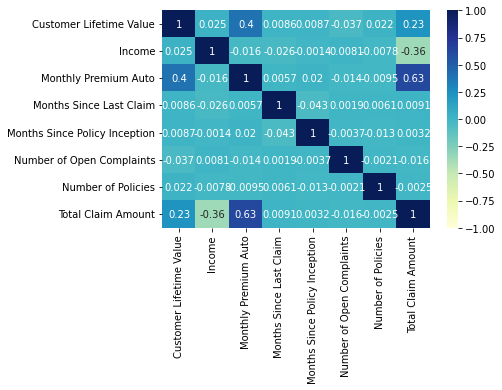

In [ ]:
#correlation of the features in the dataset
corr = df.corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

### **Data Visualization**

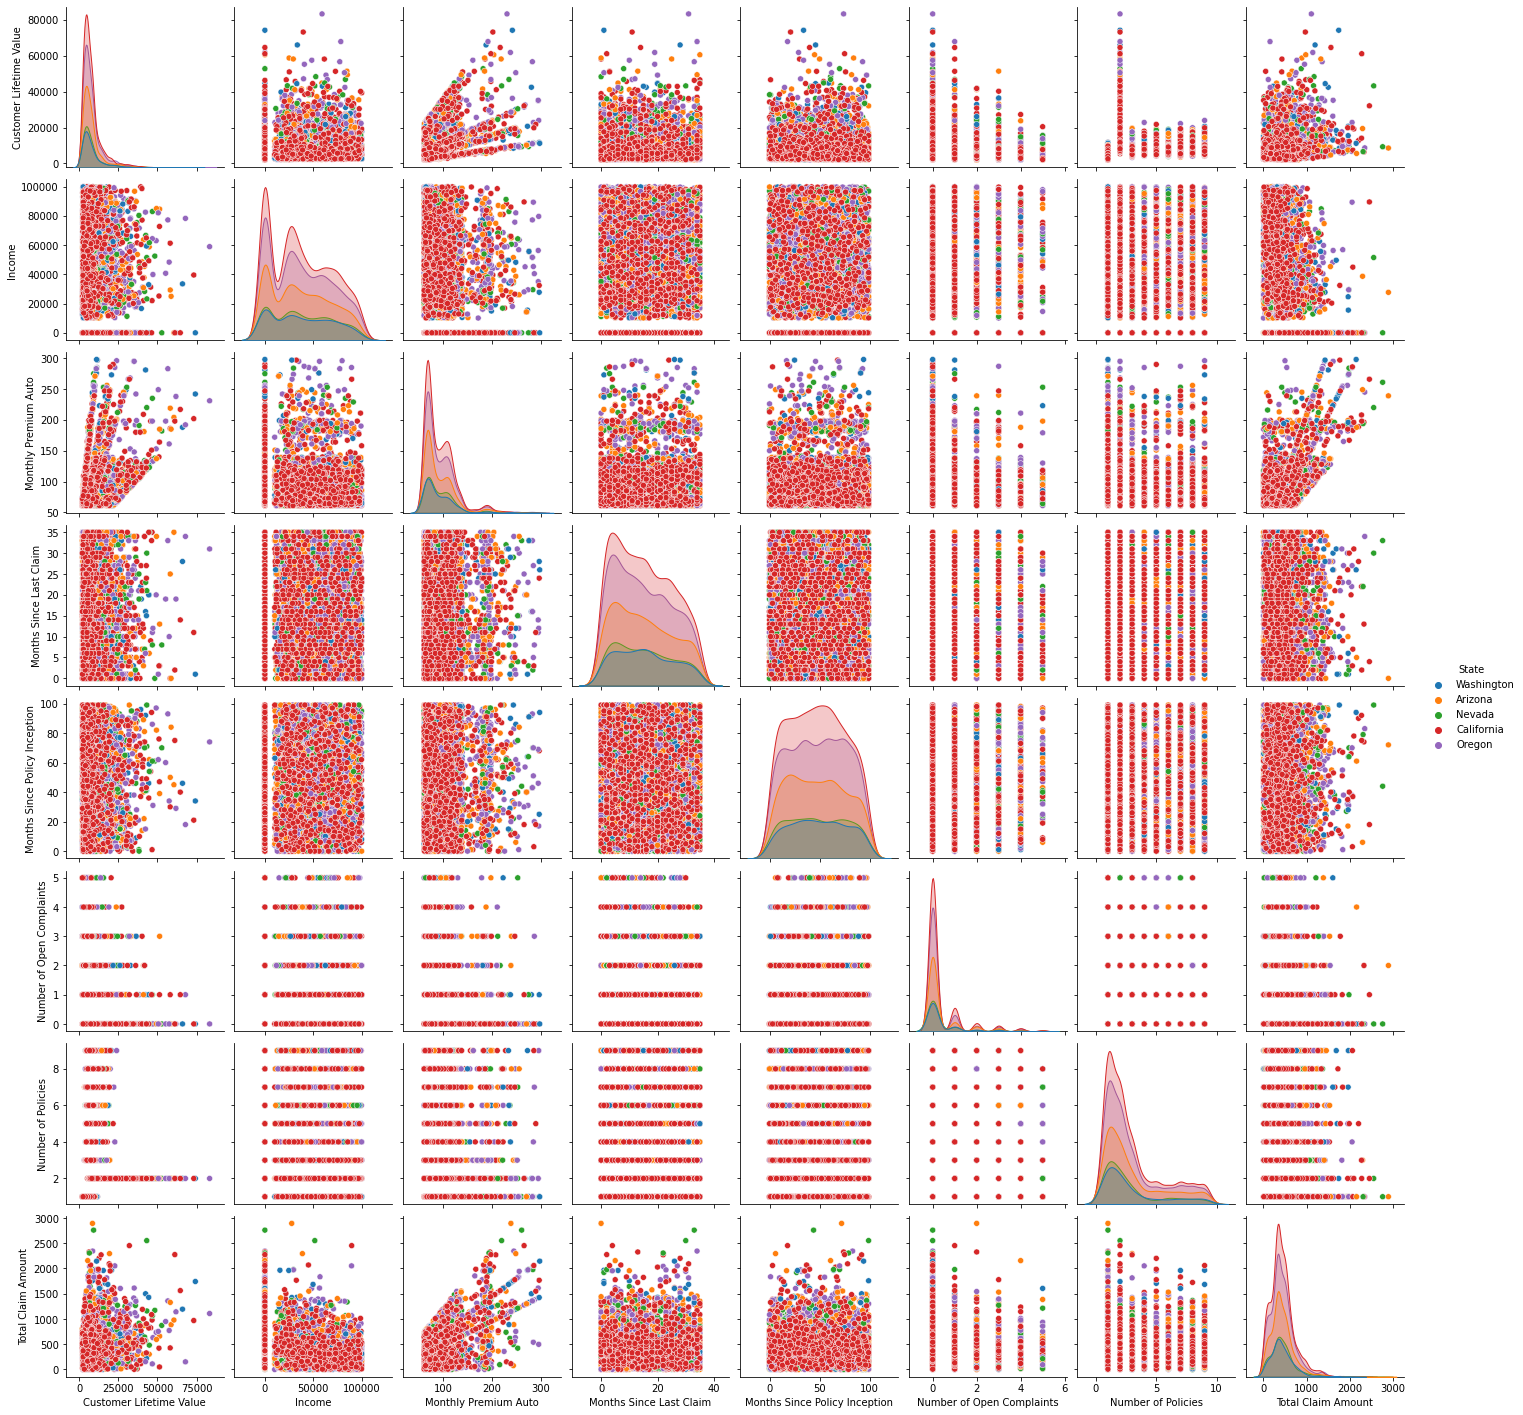

In [ ]:
sns.pairplot(df, hue='State')

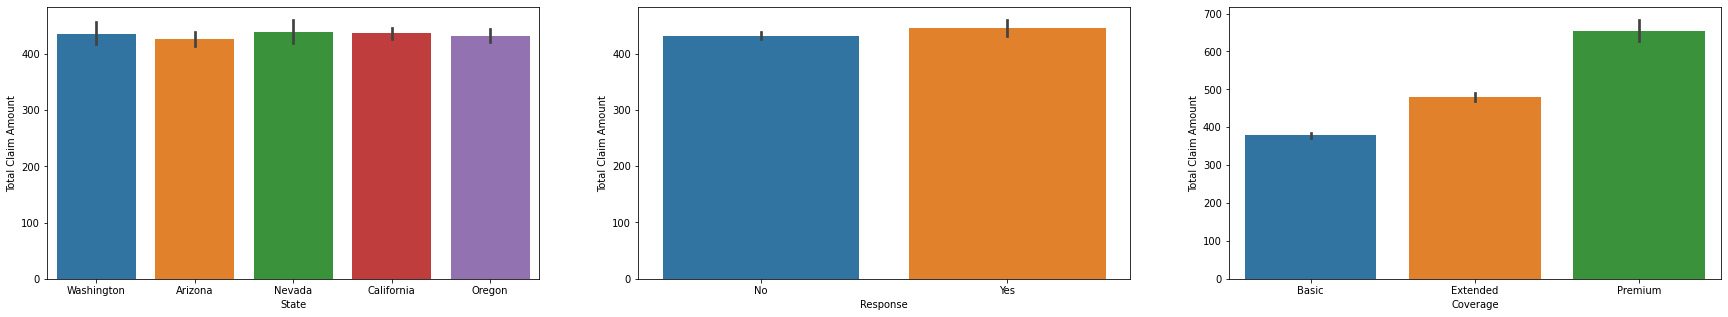

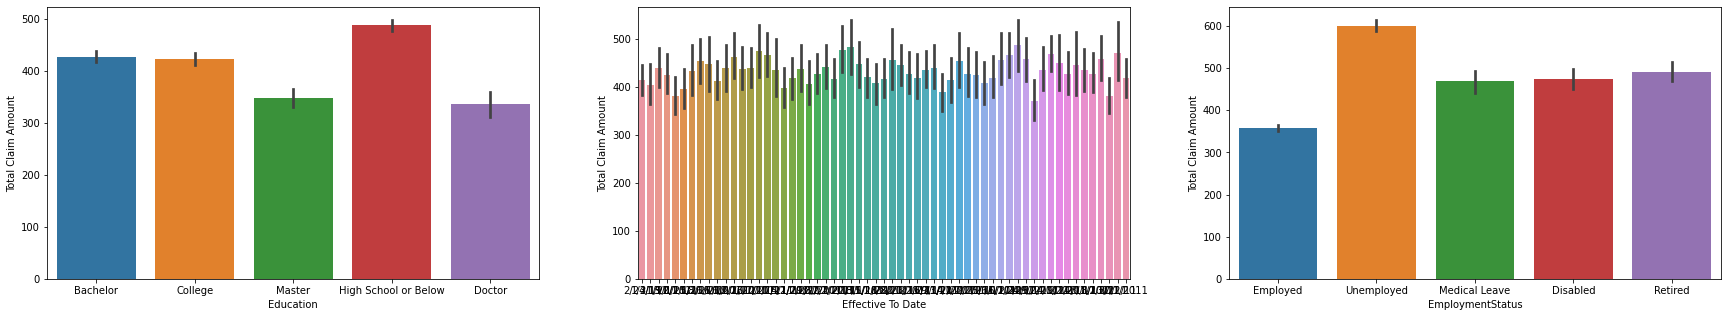

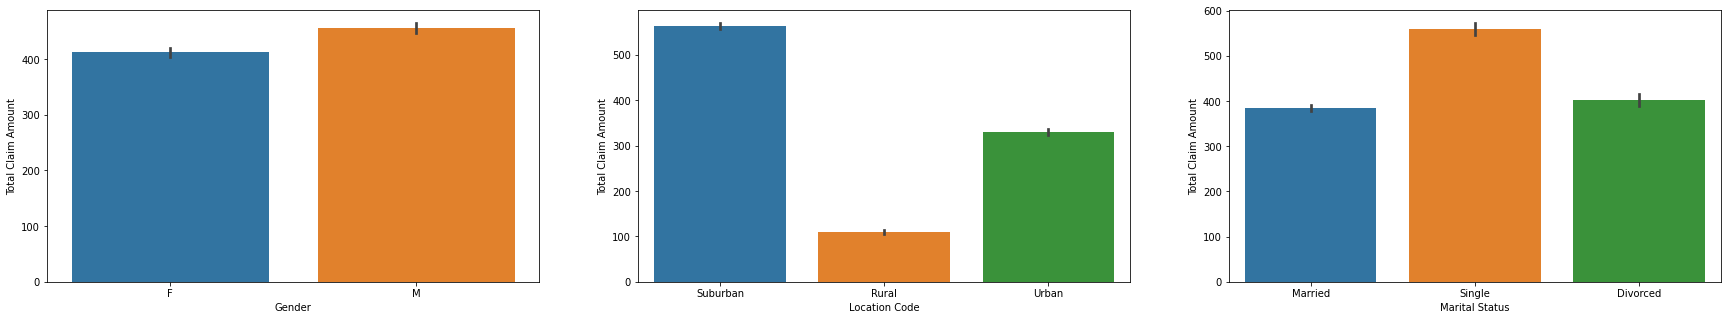

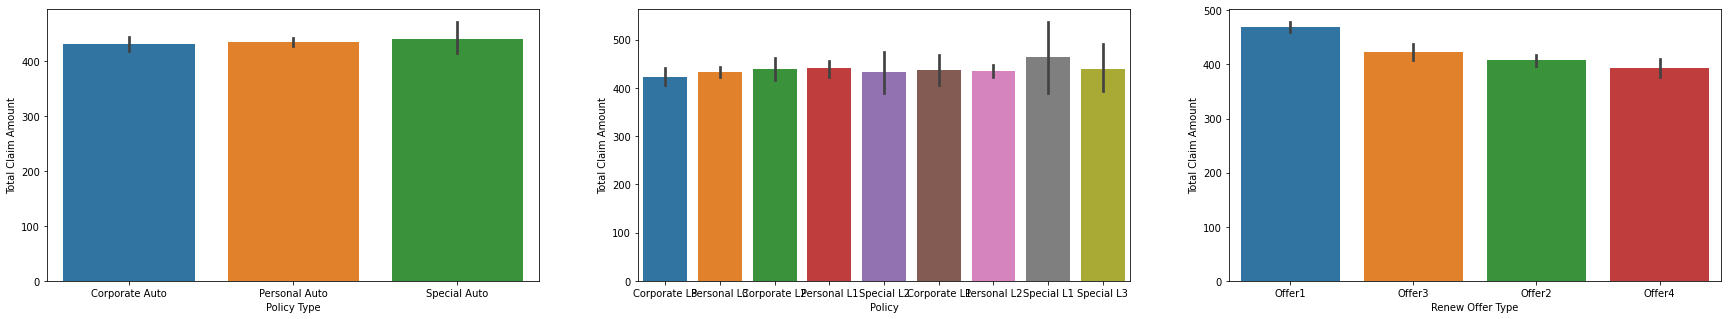

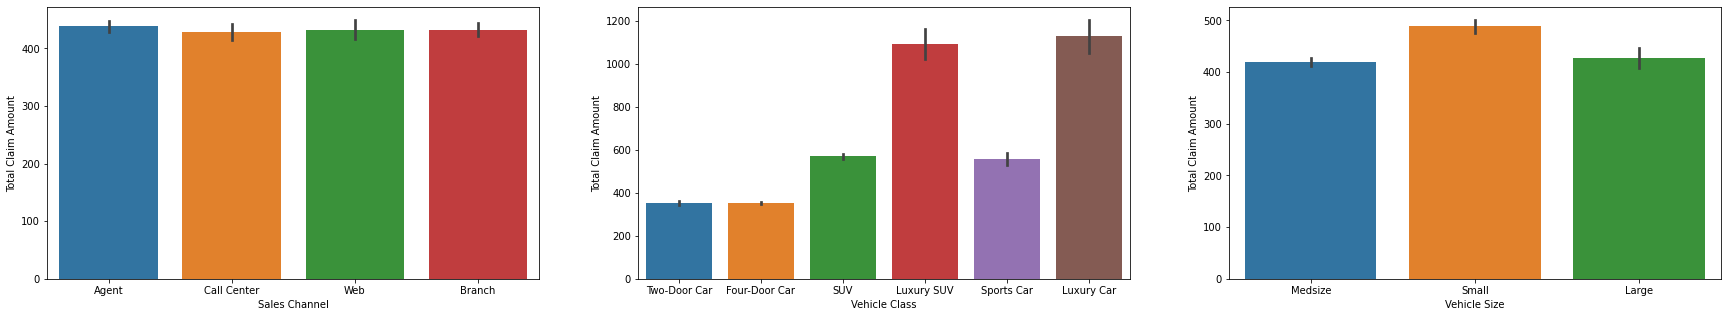

In [ ]:
# Plot the relationship between the independent variables (State, Response, Coverage, Education, Effective to date, Employment status, gender, location, matital status, Sales channe, vehicle type and vehicle class)
# and the dependent/target variable (Total Claim Amount)

fig, (ax0, ax1, ax2 ) = plt.subplots(1,3, figsize=(30,5))
sns.barplot(data=df, y='Total Claim Amount', x='State', ax=ax0);
sns.barplot(data=df, y='Total Claim Amount', x='Response', ax=ax1);
sns.barplot(data=df, y='Total Claim Amount', x='Coverage', ax=ax2)

fig, (ax3, ax4, ax5 ) = plt.subplots(1,3, figsize=(30,5))
sns.barplot(data=df, y='Total Claim Amount', x='Education', ax=ax3);
sns.barplot(data=df, y='Total Claim Amount', x='Effective To Date', ax=ax4);
sns.barplot(data=df, y='Total Claim Amount', x='EmploymentStatus', ax=ax5);

fig, (ax6, ax7, ax8 ) = plt.subplots(1,3, figsize=(30,5))
sns.barplot(data=df, y='Total Claim Amount', x='Gender', ax=ax6);
sns.barplot(data=df, y='Total Claim Amount', x='Location Code', ax=ax7);
sns.barplot(data=df, y='Total Claim Amount', x='Marital Status', ax=ax8);

fig, (ax9, ax10, ax11 ) = plt.subplots(1,3, figsize=(30,5))
sns.barplot(data=df, y='Total Claim Amount', x='Policy Type', orient='v', ax=ax9);
sns.barplot(data=df, y='Total Claim Amount', x='Policy', ax=ax10);
sns.barplot(data=df, y='Total Claim Amount', x='Renew Offer Type', ax=ax11);

fig, (ax12, ax13, ax14 ) = plt.subplots(1,3, figsize=(30,5))
sns.barplot(data=df, y='Total Claim Amount', x='Sales Channel', ax=ax12);
sns.barplot(data=df, y='Total Claim Amount', x='Vehicle Class', ax=ax13);
sns.barplot(data=df, y='Total Claim Amount', x='Vehicle Size', ax=ax14)




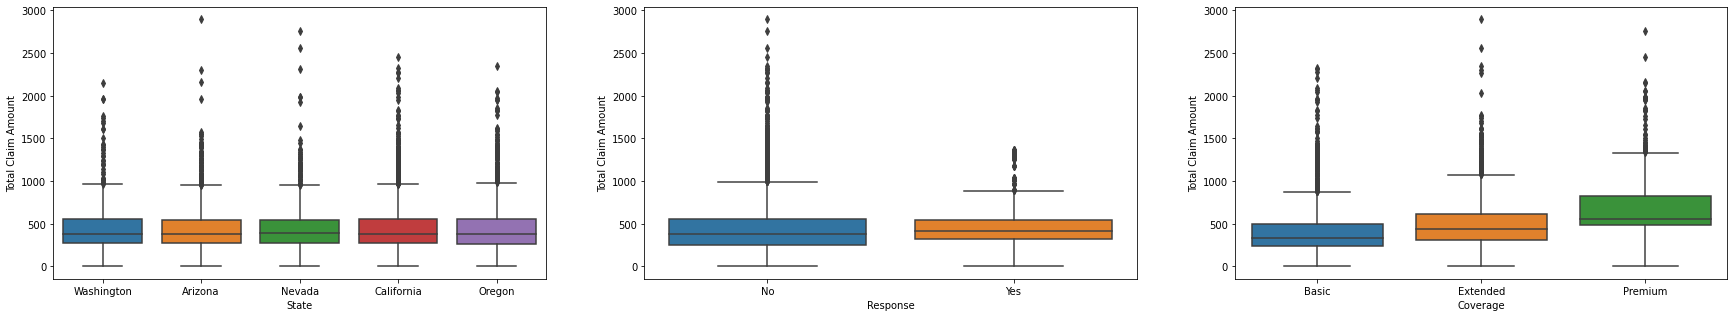

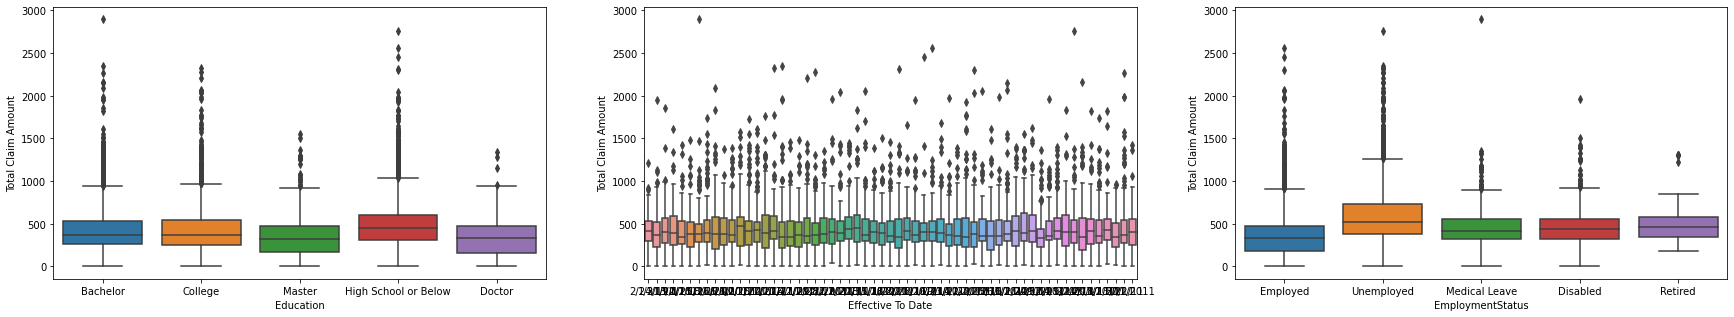

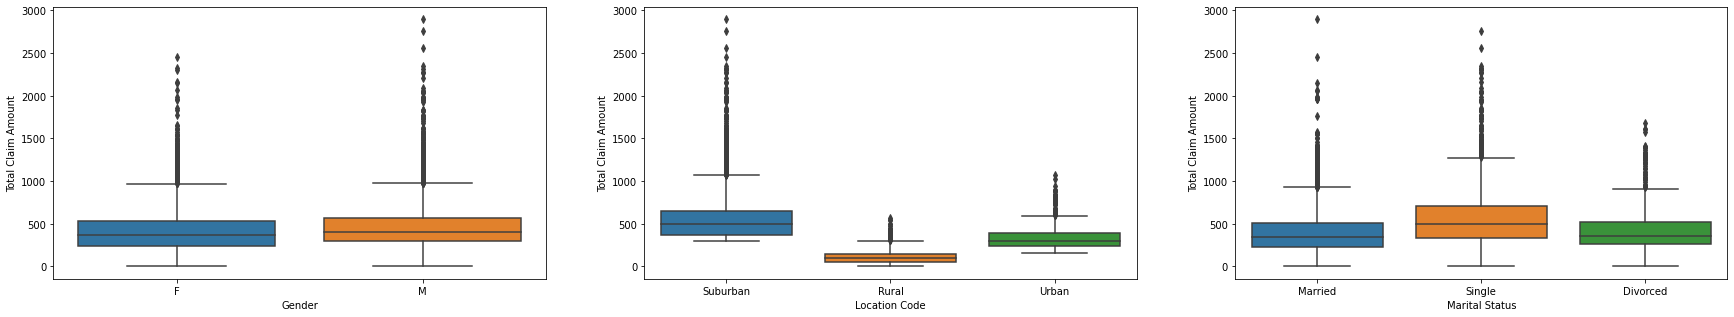

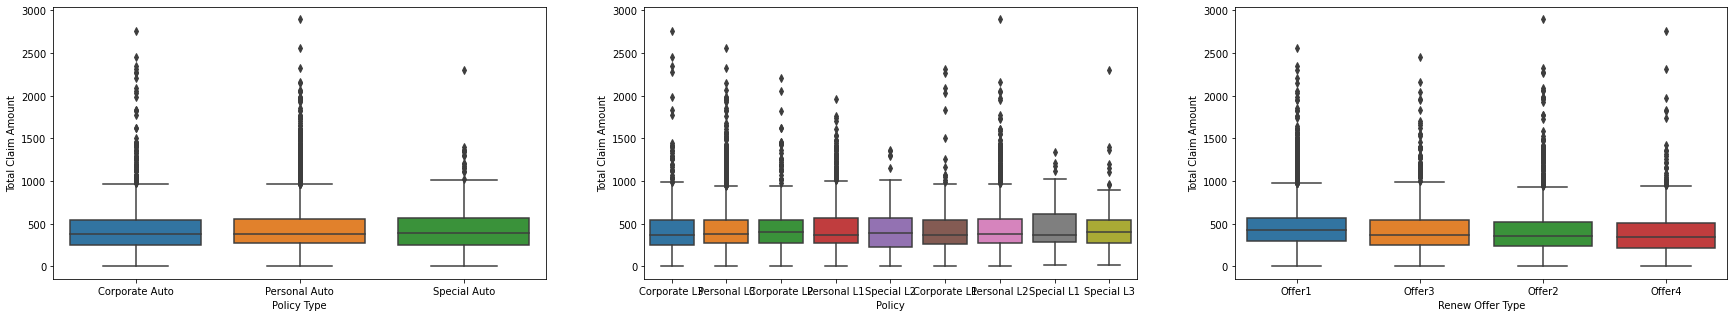

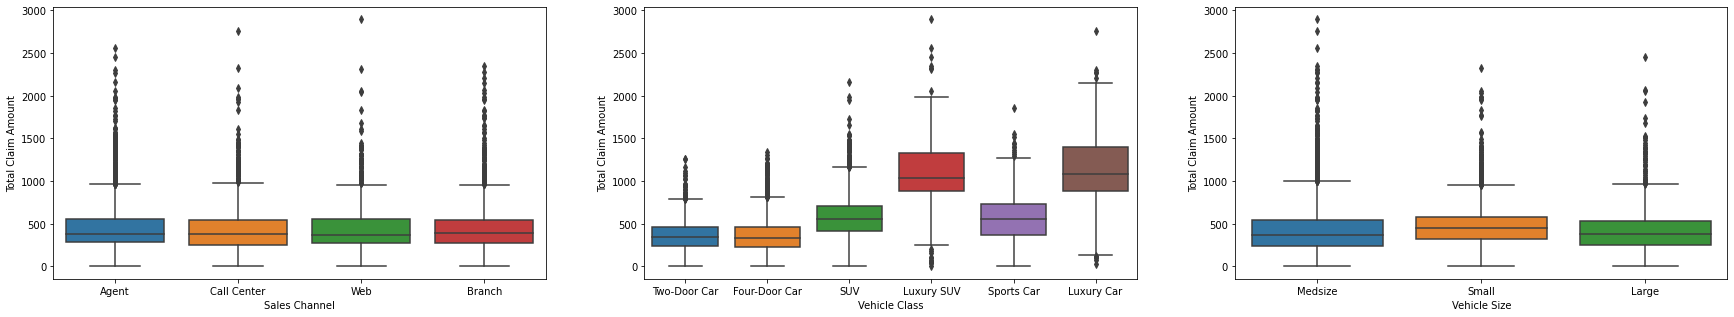

In [ ]:
# Plot the relationship between the independent variables (State, Response, Coverage, Education, Effective to date, Employment status, gender, location, matital status, Sales channe, vehicle type and vehicle class)
# and the dependent/target variable (Total Claim Amount)

fig, (ax0, ax1, ax2 ) = plt.subplots(1,3, figsize=(30,5))
sns.boxplot(data=df, y='Total Claim Amount', x='State', ax=ax0);
sns.boxplot(data=df, y='Total Claim Amount', x='Response', ax=ax1);
sns.boxplot(data=df, y='Total Claim Amount', x='Coverage', ax=ax2)

fig, (ax3, ax4, ax5 ) = plt.subplots(1,3, figsize=(30,5))
sns.boxplot(data=df, y='Total Claim Amount', x='Education', ax=ax3);
sns.boxplot(data=df, y='Total Claim Amount', x='Effective To Date', ax=ax4);
sns.boxplot(data=df, y='Total Claim Amount', x='EmploymentStatus', ax=ax5);

fig, (ax6, ax7, ax8 ) = plt.subplots(1,3, figsize=(30,5))
sns.boxplot(data=df, y='Total Claim Amount', x='Gender', ax=ax6);
sns.boxplot(data=df, y='Total Claim Amount', x='Location Code', ax=ax7);
sns.boxplot(data=df, y='Total Claim Amount', x='Marital Status', ax=ax8);

fig, (ax9, ax10, ax11 ) = plt.subplots(1,3, figsize=(30,5))
sns.boxplot(data=df, y='Total Claim Amount', x='Policy Type', orient='v', ax=ax9);
sns.boxplot(data=df, y='Total Claim Amount', x='Policy', ax=ax10);
sns.boxplot(data=df, y='Total Claim Amount', x='Renew Offer Type', ax=ax11);

fig, (ax12, ax13, ax14 ) = plt.subplots(1,3, figsize=(30,5))
sns.boxplot(data=df, y='Total Claim Amount', x='Sales Channel', ax=ax12);
sns.boxplot(data=df, y='Total Claim Amount', x='Vehicle Class', ax=ax13);
sns.boxplot(data=df, y='Total Claim Amount', x='Vehicle Size', ax=ax14)


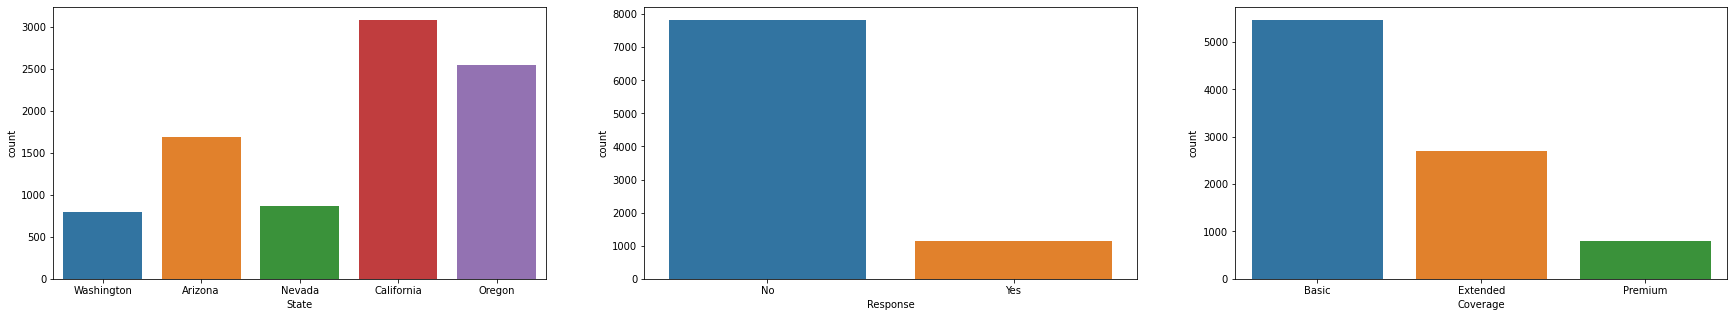

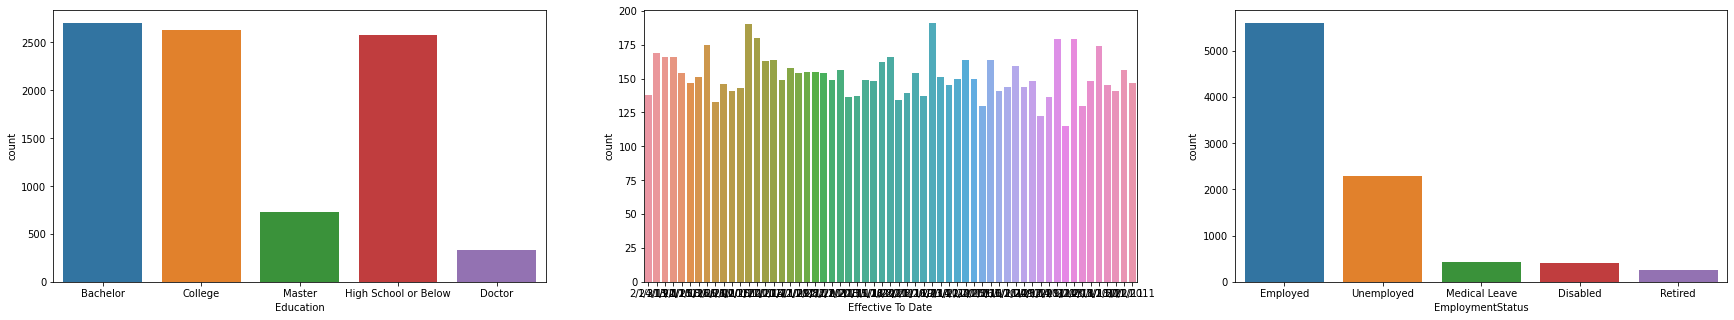

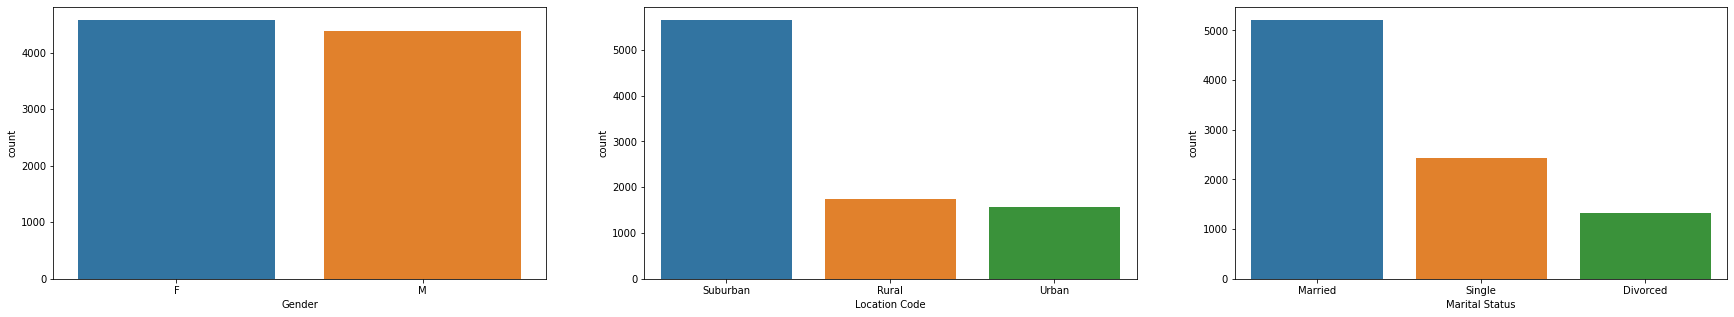

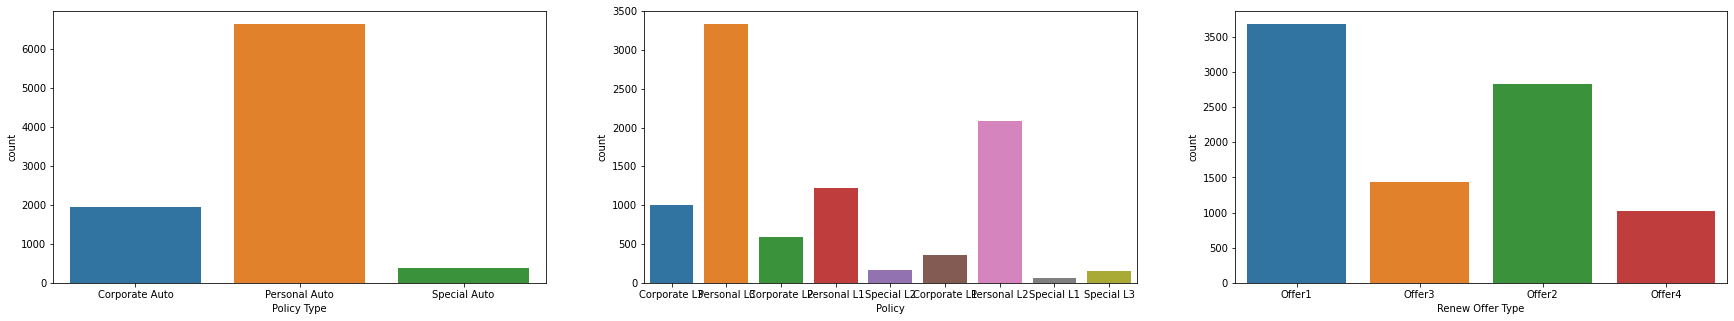

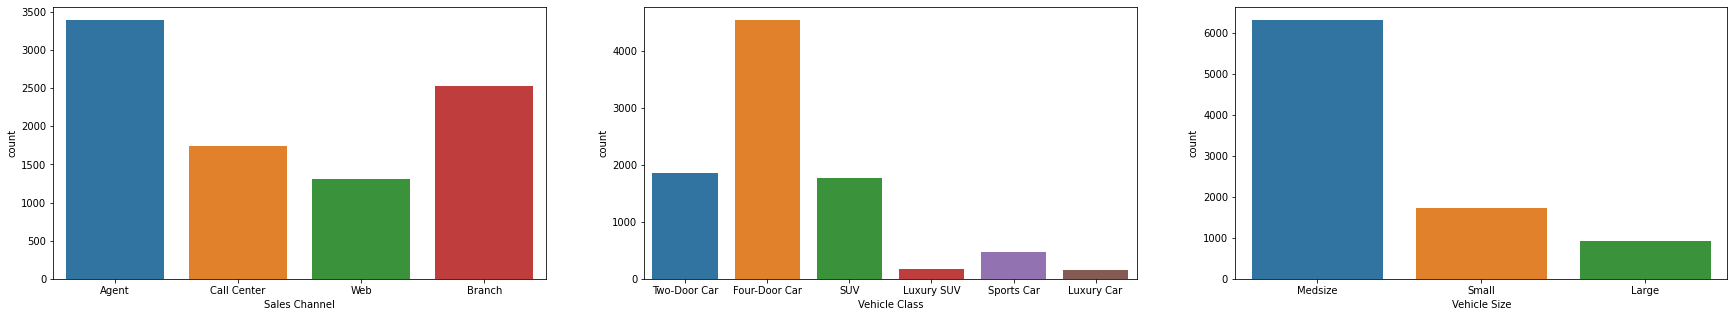

In [ ]:
# Plot the relationship between the independent variables (State, Response, Coverage, Education, Effective to date, Employment status, gender, location, matital status, Sales channe, vehicle type and vehicle class)
# and the dependent/target variable (Total Claim Amount)

fig, (ax0, ax1, ax2 ) = plt.subplots(1,3, figsize=(30,5))
sns.countplot(x=df['State'], ax=ax0);
sns.countplot(x=df['Response'], ax=ax1);
sns.countplot(x=df['Coverage'], ax=ax2)

fig, (ax3, ax4, ax5 ) = plt.subplots(1,3, figsize=(30,5))
sns.countplot(x=df['Education'], ax=ax3);
sns.countplot(x=df['Effective To Date'], ax=ax4);
sns.countplot(x=df['EmploymentStatus'], ax=ax5);

fig, (ax6, ax7, ax8 ) = plt.subplots(1,3, figsize=(30,5))
sns.countplot(x=df['Gender'], ax=ax6);
sns.countplot(x=df['Location Code'], ax=ax7);
sns.countplot(x=df['Marital Status'], ax=ax8);

fig, (ax9, ax10, ax11 ) = plt.subplots(1,3, figsize=(30,5))
sns.countplot(x=df['Policy Type'], ax=ax9);
sns.countplot(x=df['Policy'], ax=ax10);
sns.countplot(x=df['Renew Offer Type'], ax=ax11);

fig, (ax12, ax13, ax14 ) = plt.subplots(1,3, figsize=(30,5))
sns.countplot(x=df['Sales Channel'], ax=ax12);
sns.countplot(x=df['Vehicle Class'], ax=ax13);
sns.countplot(x=df['Vehicle Size'], ax=ax14)


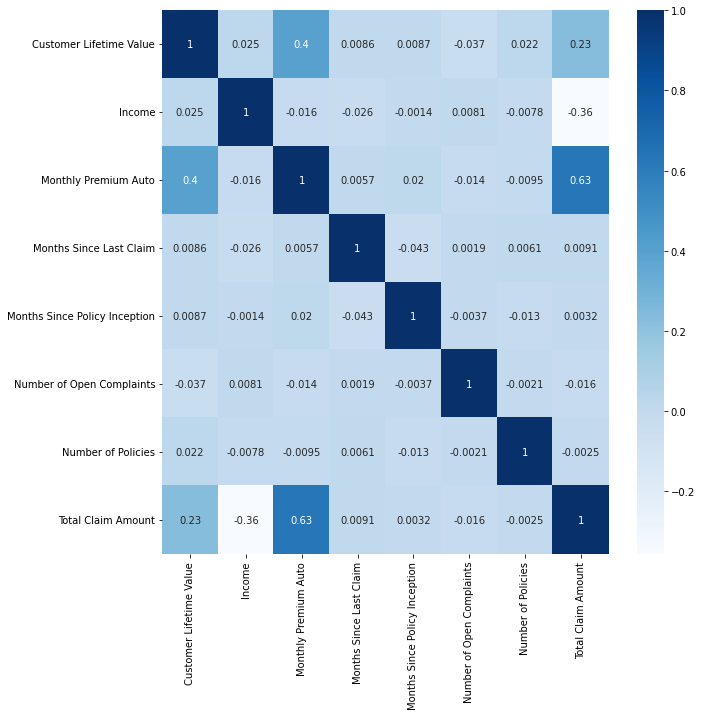

In [ ]:
# Use a heatmap to check for collinearity between variables
# A higher (darker) value represents higher correlation between two variables
# A lower (lighter) value represents lower correlation between two variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

### **Variables Encoding**

In [ ]:
# Transform categorical variables to numerical values and create a new variable 
# to store each of the encoded values
encoder = LabelEncoder()
df['State_encoded'] = encoder.fit_transform(df['State'])
df['Response_encoded'] = encoder.fit_transform(df['Response'])
df['Coverage_encoded'] = encoder.fit_transform(df['Coverage'])
df['Education_encoded'] = encoder.fit_transform(df['Education'])
df['Effective To Date_encoded'] = encoder.fit_transform(df['Effective To Date'])
df['EmploymentStatus_encoded'] = encoder.fit_transform(df['EmploymentStatus'])
df['Gender_encoded'] = encoder.fit_transform(df['Gender'])
df['Location_Code_encoded'] = encoder.fit_transform(df['Location Code'])
df['Marital_Status_encoded'] = encoder.fit_transform(df['Marital Status'])
df['Policy_Type_encoded'] = encoder.fit_transform(df['Policy Type'])
df['Policy_encoded'] = encoder.fit_transform(df['Policy'])
df['Renew_Offer_Type_encoded'] = encoder.fit_transform(df['Renew Offer Type'])
df['Sales_Channel_encoded'] = encoder.fit_transform(df['Sales Channel'])
df['Vehicle_Size_encoded'] = encoder.fit_transform(df['Vehicle Size'])
df['Vehicle_Class_encoded'] = encoder.fit_transform(df['Vehicle Class'])
df['Total_Claim_Amount_transformed'] = stats.boxcox(df['Total Claim Amount'])[0]
df.head()


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Gender_encoded,Location_Code_encoded,Marital_Status_encoded,Policy_Type_encoded,Policy_encoded,Renew_Offer_Type_encoded,Sales_Channel_encoded,Vehicle_Size_encoded,Vehicle_Class_encoded,Total_Claim_Amount_transformed
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,1,0,2,0,0,1,5,32.956920
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,0,1,2,1,5,2,0,1,0,56.192515
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,1,1,1,5,0,0,1,5,39.968464
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,1,1,1,0,1,0,2,1,3,38.664596
HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,1,0,2,1,3,0,0,1,0,19.523131


In [ ]:
df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'State_encoded', 'Response_encoded',
       'Coverage_encoded', 'Education_encoded', 'Effective To Date_encoded',
       'EmploymentStatus_encoded', 'Gender_encoded', 'Location_Code_encoded',
       'Marital_Status_encoded', 'Policy_Type_encoded', 'Policy_encoded',
       'Renew_Offer_Type_encoded', 'Sales_Channel_encoded',
       'Vehicle_Size_encoded', 'Vehicle_Class_encoded',
       'Total_Claim_Amount_transformed'],
      dtype='object')

## **Part 3. Splitting Data**

In [ ]:
X = df[['State_encoded','Response_encoded','Coverage_encoded','Education_encoded','Effective To Date_encoded','EmploymentStatus_encoded','Gender_encoded','Location_Code_encoded','Marital_Status_encoded','Policy_Type_encoded','Policy_encoded','Renew_Offer_Type_encoded', 'Sales_Channel_encoded','Vehicle_Size_encoded', 'Vehicle_Class_encoded', 'Customer Lifetime Value', 'Income', 'Months Since Last Claim','Monthly Premium Auto','Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies']]
y = df['Total_Claim_Amount_transformed']

In [ ]:
# Split the dataset into X_train, X_test, y_train, and y_test
# Retain 30% of the data for testing, and use a random_state value of "0"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

## **Part 4. ML Technique - Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

# Fit the model using the training data
regressor.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_18 <= 105.50
|   |   |--- feature_18 <= 65.50
|   |   |   |--- value: [13.67]
|   |   |--- feature_18 >  65.50
|   |   |   |--- value: [15.14]
|   |--- feature_18 >  105.50
|   |   |--- feature_18 <= 193.50
|   |   |   |--- value: [19.00]
|   |   |--- feature_18 >  193.50
|   |   |   |--- value: [29.25]
|--- feature_7 >  0.50
|   |--- feature_18 <= 97.50
|   |   |--- feature_7 <= 1.50
|   |   |   |--- value: [34.53]
|   |   |--- feature_7 >  1.50
|   |   |   |--- value: [27.25]
|   |--- feature_18 >  97.50
|   |   |--- feature_18 <= 145.50
|   |   |   |--- value: [41.40]
|   |   |--- feature_18 >  145.50
|   |   |   |--- value: [55.33]



## **Part 5. Model evaluation**

In [ ]:
# The metrics package in Python can derive the model evaluation metrics
print("Mean squared error (MSE) =", metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(y_test, y_pred))
print("R^2 =", metrics.r2_score(y_test, y_pred))

Mean squared error (MSE) = 32.53075524832747
Mean absolute error (MAE) = 4.393016884520892
R^2 = 0.7669653619314123


A R^2 value of ***77%*** indicates that our model can explain ***77%*** of the variance in the data, so it performs quite well!

